In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

In [58]:
# !pip3 install matplotlib
# !pip3 install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 7.1 MB/s eta 0:00:00a 0:00:01


In [2]:
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

In [3]:
train = pd.read_csv("./data/train.csv")

In [4]:
train.head()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,TRAIN_00003,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,TRAIN_00004,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B


## Categoric

- 데이터 모든 피쳐에 imbalanced가 있음
  - 아마 로그 변환?

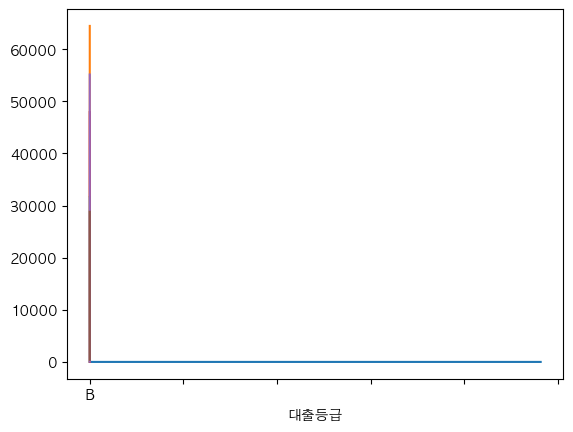

In [5]:
categoric_col = train.select_dtypes(include='object').columns # 범주형

for i in categoric_col:
    train[i].value_counts().plot()

In [6]:
categoric_col

Index(['ID', '대출기간', '근로기간', '주택소유상태', '대출목적', '대출등급'], dtype='object')

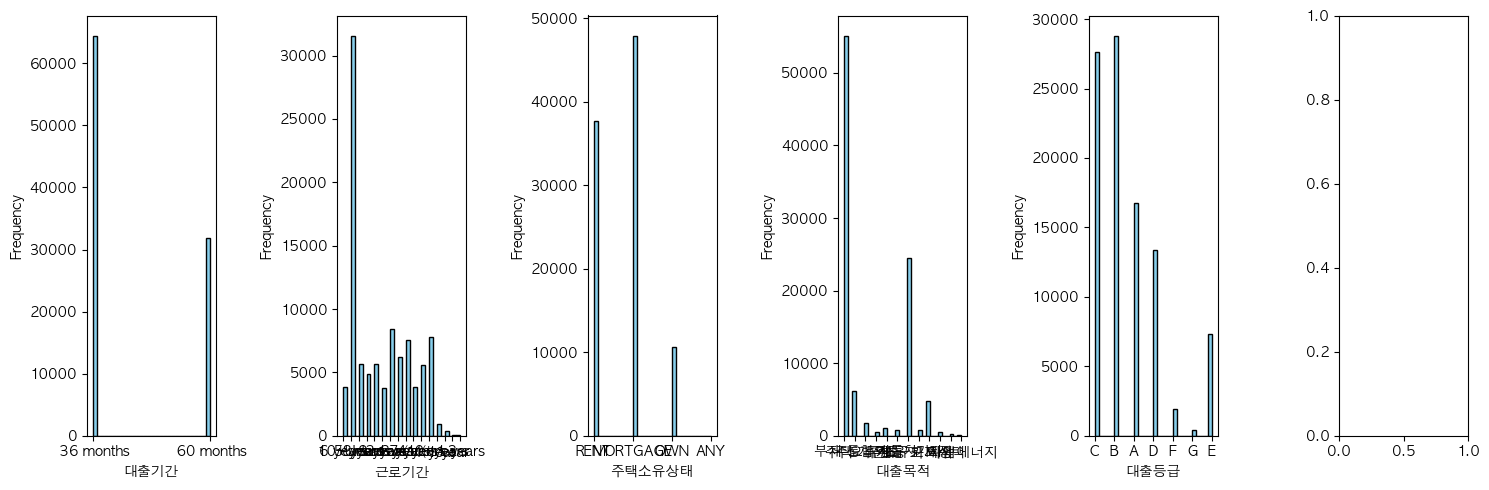

In [7]:
num_vars = len(categoric_col)

# 서브플롯 생성
fig, axes = plt.subplots(nrows=1, ncols=num_vars, figsize=(15, 5))

# 각 수치형 변수에 대해 히스토그램 그리기
for i, col in enumerate(categoric_col[1:]):
    axes[i].hist(train[col], bins=30, color='skyblue', edgecolor='black')
    # axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# 레이아웃 조정
plt.tight_layout()

# 그래프 보여주기
plt.show()

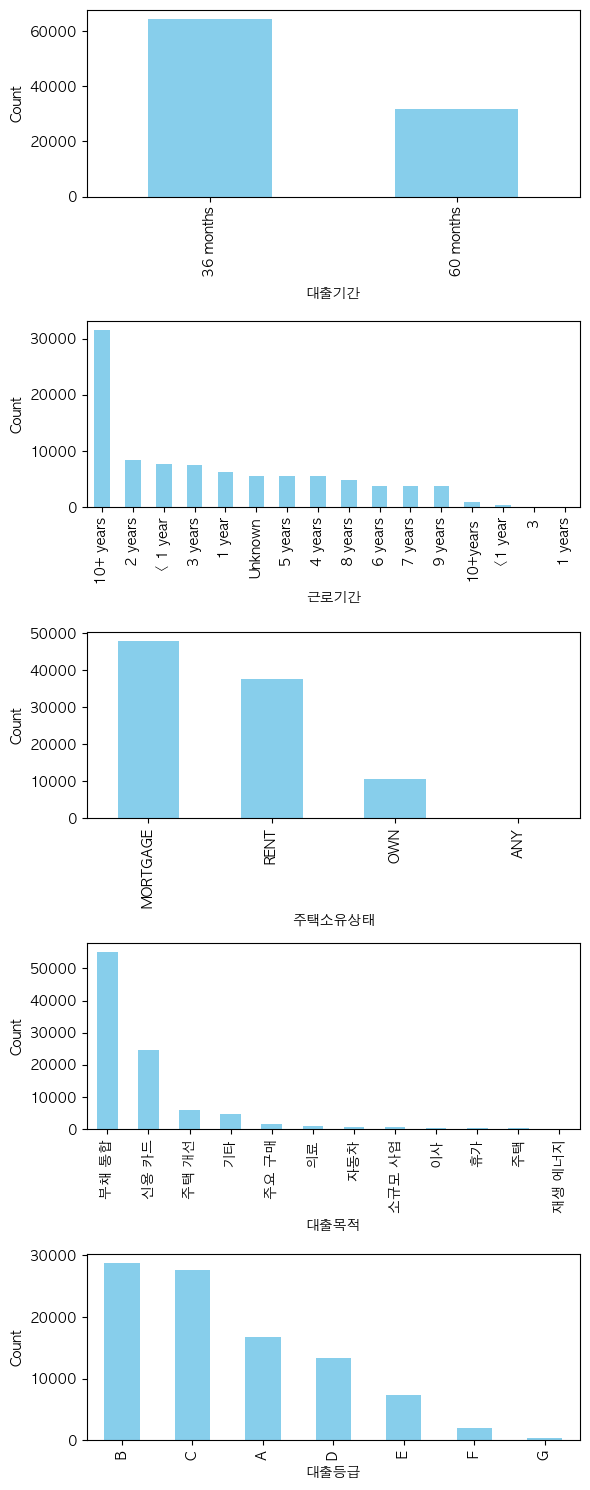

In [8]:
fig, axes = plt.subplots(nrows=len(categoric_col)-1, figsize=(6, 3 * (len(categoric_col)-1)))

for i, col in enumerate(categoric_col[1:]):
    train[col].value_counts().plot(kind='bar', ax=axes[i], color='skyblue')
    # axes[i].set_title(f'Count of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()

# 그래프 보여주기
plt.show()

In [9]:
for i in categoric_col:
    train[i] = np.log(train[i])

TypeError: loop of ufunc does not support argument 0 of type str which has no callable log method

## Numeric_col

대출 금액을 제외한 나머지 피쳐들의 이상치가 있음
- 이상치 제거?


In [10]:
numeric_col = train.select_dtypes(include='int64').columns # 수치형
numeric_col

Index(['대출금액', '연간소득', '총계좌수', '최근_2년간_연체_횟수', '총상환원금'], dtype='object')

In [11]:
train[numeric_col].describe()

,대출금액,연간소득,총계좌수,최근_2년간_연체_횟수,총상환원금
count,9.629400e+04,9.629400e+04,96294.000000,96294.000000,9.629400e+04
mean,1.830400e+07,9.392672e+07,25.304827,0.345681,8.225035e+05
std,1.032908e+07,9.956871e+07,12.088566,0.919119,1.027745e+06
min,1.200000e+06,0.000000e+00,4.000000,0.000000,0.000000e+00
25%,1.020000e+07,5.760000e+07,17.000000,0.000000,3.075720e+05
50%,1.680000e+07,7.800000e+07,24.000000,0.000000,5.976960e+05
75%,2.400000e+07,1.128000e+08,32.000000,0.000000,1.055076e+06
max,4.200000e+07,1.080000e+10,169.000000,30.000000,4.195594e+07


In [64]:
numeric_col

Index(['대출금액', '연간소득', '총계좌수', '최근_2년간_연체_횟수', '총상환원금'], dtype='object')

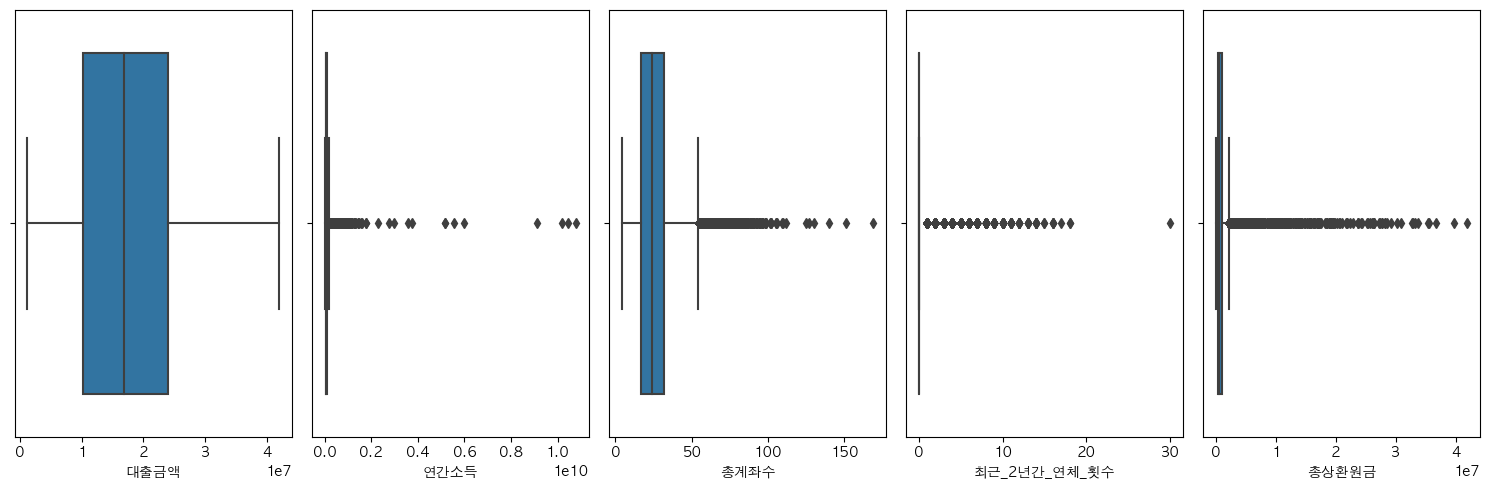

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_col = train.select_dtypes(include='int64').columns # 수치형

# 수치형 변수의 개수
num_vars = len(numeric_col)

# 서브플롯 생성
fig, axes = plt.subplots(nrows=1, ncols=num_vars, figsize=(15, 5))

# 각 수치형 변수에 대해 Box Plot 그리기
for i, col in enumerate(numeric_col):  # 처음 두 열은 제외
    sns.boxplot(x=train[col], ax=axes[i])

# 레이아웃 조정
plt.tight_layout()

# 그래프 보여주기
plt.show()

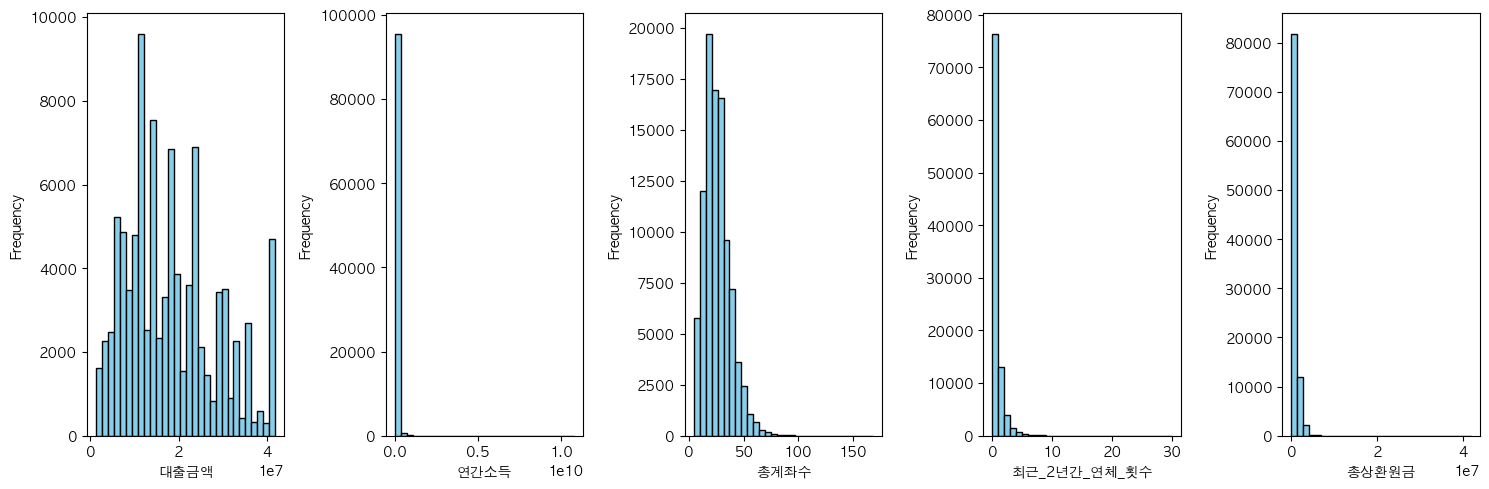

In [13]:
import matplotlib.pyplot as plt

numeric_col = train.select_dtypes(include='int64').columns # 수치형

# 수치형 변수의 개수
num_vars = len(numeric_col)

# 서브플롯 생성
fig, axes = plt.subplots(nrows=1, ncols=num_vars, figsize=(15, 5))

# 각 수치형 변수에 대해 히스토그램 그리기
for i, col in enumerate(numeric_col):
    axes[i].hist(train[col], bins=30, color='skyblue', edgecolor='black')
    # axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# 레이아웃 조정
plt.tight_layout()

# 그래프 보여주기
plt.show()

In [78]:
from scipy.stats import skew, kurtosis

numeric_col = train.select_dtypes(include='int64').columns # 수치형

# 각 수치형 변수에 대해 왜도와 첨도 계산
for col in numeric_col:
    skewness = skew(train[col])
    kurt = kurtosis(train[col])
    
    print(f'{col:} - Skewness: {skewness:.3f}, Kurtosis: {kurt:.3f}')
    print()

# 왜도: 0에 가까울 수록 대칭적
# 첨도: 3에 가까울 수록 뾰족함이 정규분포와 근사

대출금액 - Skewness: 0.614, Kurtosis: -0.407

연간소득 - Skewness: 52.670, Kurtosis: 4823.874

총계좌수 - Skewness: 1.019, Kurtosis: 2.171

최근_2년간_연체_횟수 - Skewness: 5.317, Kurtosis: 52.187

총상환원금 - Skewness: 11.893, Kurtosis: 283.538

